[Registro de asistencia a asesoría](https://forms.gle/FNg7WMenKvcgEh2T6)

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marco-canas/fundamentos_logica/blob/main/4_fase_1_diagnostico_planificacion/0_formatos_clase/1_class_logica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/marco-canas/fundamentos_logica/blob/main/4_fase_1_diagnostico_planificacion/0_formatos_clase/1_class_logica.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

# Prompt 

Dame un diseño, para evaluar de manera manuscrita, a mis estudiantes del curso de Análisis Numérico sobre los temas de "Interpolación lineal y cuadrática, regresión lineal y cuadrática y diferenciación numérica". El parcial debe tener 5 puntos y con un nivel profesional para evaluar a futuros docentes de matemáticas de la Universidad de Antioquia. Diséñamelo, de tal manera que los datos de cada punto, se le indique a cada estudiante, como generarlos a partir de su documento de identidad, para evitar problemas de fraude durante la realización del parcial de dos horas.   



Temas a evaluar en este parcial:  

* **Interpolación lineal**
* **Interpolación cuadrática (Lagrange o Newton)**
* **Regresión lineal y cuadrática**
* **Diferenciación numérica (adelante, atrás, centradas, orden del error)**

Diseñado para **futuros docentes de matemáticas** y con **generación individual de datos** a partir del **documento de identidad (CC)** de cada estudiante para evitar copia y plagio.

---



# **Parcial manuscrito — Análisis Numérico**



# **“Interpolación, regresión y diferenciación numérica”**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sympy import symbols, interpolate
from IPython.display import display


# **PUNTO 1 — Interpolación Lineal**

In [22]:
import numpy as np 
import pandas as pd 
x = np.array([2,4])
y = np.array([1,3]) 

df1 = pd.DataFrame({"x": x, "y": y})
df1


,x,y
0,2,1
1,4,3


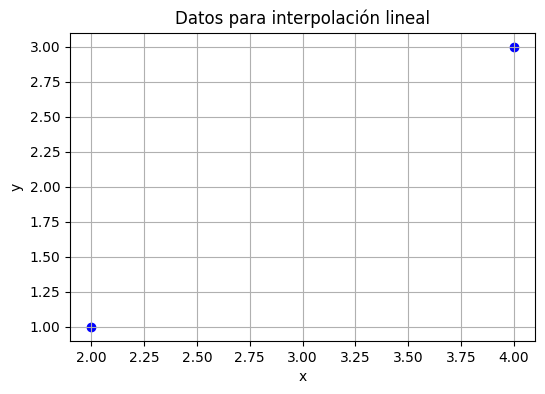

In [23]:
import matplotlib.pyplot as plt 
from sympy import * 
# Gráfico de los datos
plt.figure(figsize=(6,4))
plt.scatter(x, y, color="blue")
plt.title("Datos para interpolación lineal")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.savefig(r"C:\Users\marco\Downloads\datos_interpolacion_lineal.png")
plt.show()


In [24]:

# Interpolación lineal con SymPy
t = symbols('t')
poly_lin = interpolate([(x[0], y[0]), (x[1], y[1])], t)

print("Polinomio de interpolación lineal:")
poly_lin


Polinomio de interpolación lineal:


t - 1

In [20]:

# Predicción
x_pred = 2.75
y_pred = poly_lin.subs(t, x_pred)
print(f"Predicción en x = {x_pred}:  y = {float(y_pred)}")


Predicción en x = 2.75:  y = 6.0


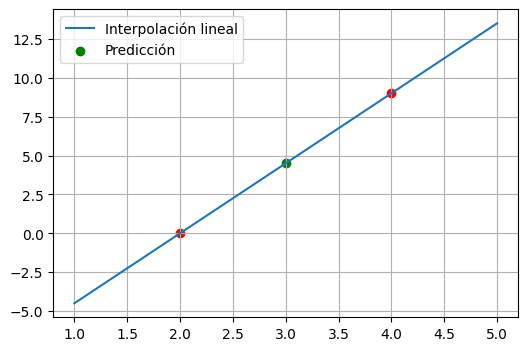

In [15]:

# Gráfico del modelo
t_vals = np.linspace(x[0]-1, x[1]+1, 200)
y_vals = [poly_lin.subs(t, val) for val in t_vals]

plt.figure(figsize=(6,4))
plt.plot(t_vals, y_vals, label="Interpolación lineal")
plt.scatter(x, y, color="red")
plt.scatter([x_pred], [y_pred], color="green", label="Predicción")
plt.legend()
plt.grid(True)

plt.savefig(r"C:\Users\marco\Downloads\interpolacion_lineal.png")
plt.show()



# **PUNTO 2 — INTERPOLACIÓN CUADRÁTICA**


In [2]:
import numpy as np 
import pandas as pd

x = np.array([1,   2, 5])
y = np.array([4.5, 3, 7])

df2 = pd.DataFrame({"x": x, "y": y})
df2


,x,y
0,1,4.5
1,2,3.0
2,5,7.0


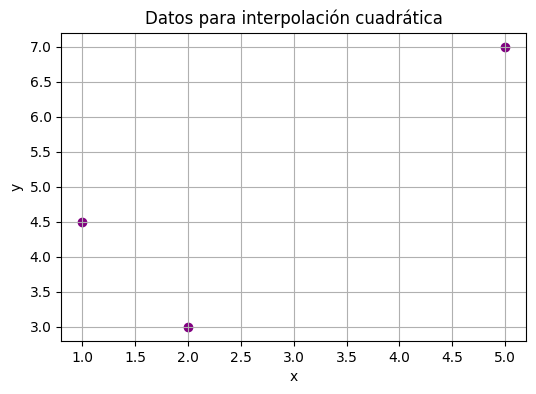

In [3]:
import matplotlib.pyplot as plt 
# Gráfico de datos
plt.figure(figsize=(6,4))
plt.scatter(x, y, color="purple")
plt.title("Datos para interpolación cuadrática")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.savefig(r"C:\Users\marco\Downloads\datos_interpolacion_cuadratica.png")
plt.show()


In [4]:

# Interpolación cuadrática con SymPy
from sympy import *
t = symbols('t')
poly_quad = interpolate([(x[i], y[i]) for i in range(3)], t)
poly_quad


0.708333333333333*t**2 - 3.625*t + 7.41666666666667

In [5]:
17/24, -29/8, 89/12 

(0.7083333333333334, -3.625, 7.416666666666667)

In [6]:

# Predicción
x_pred = x[0]+x[2]-x[1]
y_pred = poly_quad.subs(t, x_pred)
print(f"Predicción en x = {x_pred}:  y = {float(y_pred)}")


Predicción en x = 4:  y = 4.25


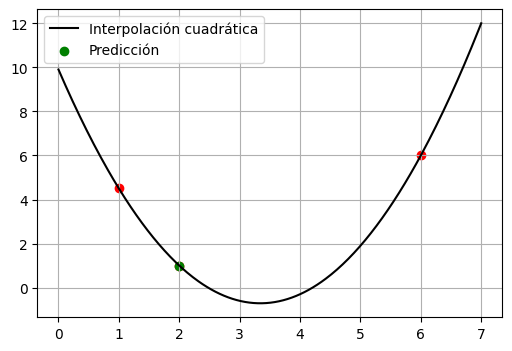

In [26]:

# Gráfico del modelo
t_vals = np.linspace(x1-1, x3+1, 300)
y_vals = [poly_quad.subs(t, val) for val in t_vals]

plt.figure(figsize=(6,4))
plt.plot(t_vals, y_vals, color="black", label="Interpolación cuadrática")
plt.scatter(x, y, color="red")
plt.scatter([x_pred], [y_pred], color="green", label="Predicción")
plt.grid(True)
plt.legend()
plt.show()



# **PUNTO 3 — REGRESIÓN LINEAL**



Generación de datos:

* 10 puntos con ruido dependiente del DNI:

  * $x_i = i$
  * $y_i = 2x_i + 3 + \text{ruido}$
  * ruido: $\text{Normal}(0, (dni \mod 5)+1)$

---



# Script


In [ ]:
print("\n\n=== PUNTO 3: REGRESIÓN LINEAL ===")

np.random.seed(dni % 1000)

x = np.arange(1, 11)
noise = np.random.normal(0, (dni % 5) + 1, size=10)
y = 2*x + 3 + noise

df3 = pd.DataFrame({"x": x, "y": y})
display(df3)

sns.scatterplot(x=x, y=y)
plt.title("Datos para regresión lineal")
plt.grid(True)
plt.show()

# Modelo
coef = np.polyfit(x, y, 1)
m, b = coef
print(f"Modelo: y = {m}x + {b}")

# Predicción
x_pred = 12
y_pred = m*x_pred + b
print(f"Predicción en x = {x_pred}: y = {y_pred}")

# Gráfico del modelo
plt.plot(x, m*x + b, color="red")
plt.scatter(x, y)
plt.grid(True)
plt.show()



# **PUNTO 4 — REGRESIÓN CUADRÁTICA**


In [ ]:

x = np.arange(1, 13)
y = x**2 - 4*x + 7 + noise

df4 = pd.DataFrame({"x": x, "y": y})
df4


In [ ]:

sns.scatterplot(x=x, y=y)
plt.title("Datos para regresión cuadrática")
plt.grid(True)
plt.show()

# Modelo
coef = np.polyfit(x, y, 2)
a, b, c = coef
print(f"Modelo: y = {a}x^2 + {b}x + {c}")

x_pred = 14
y_pred = a*x_pred**2 + b*x_pred + c
print(f"Predicción en x = {x_pred}: y = {y_pred}")

plt.plot(x, a*x**2 + b*x + c, color="orange")
plt.scatter(x, y)
plt.grid(True)
plt.show()


# **PUNTO 5 — DIFERENCIACIÓN NUMÉRICA**

Función generada según el DNI:

* $f(x) = \ln(x + (dni \mod 9) + 1)$

Se pide:

* Diferencias hacia adelante
* Diferencias hacia atrás
* Diferencias centradas


In [1]:
print("\n\n=== PUNTO 5: DIFERENCIACIÓN NUMÉRICA ===")

shift = (dni % 9) + 1

def f(x):
    return np.log(x + shift)

x_vals = np.linspace(1, 10, 10)
h = x_vals[1] - x_vals[0]

df5 = pd.DataFrame({
    "x": x_vals,
    "f(x)": f(x_vals)
})
display(df5)

# Derivadas numéricas
forward = (f(x_vals[1:]) - f(x_vals[:-1])) / h
backward = np.concatenate([[np.nan], (f(x_vals[1:]) - f(x_vals[:-1])) / h])
central = (f(x_vals[2:]) - f(x_vals[:-2])) / (2*h)

df_der = pd.DataFrame({
    "x": x_vals,
    "Forward": np.concatenate([forward, [np.nan]]),
    "Backward": backward,
    "Central": np.concatenate([[np.nan], central, [np.nan]])
})
display(df_der)

plt.plot(x_vals, f(x_vals), label="f(x)")
plt.title("Función para diferenciación")
plt.grid(True)
plt.legend()
plt.show()

plt.plot(df_der["x"], df_der["Central"], label="Central diff")
plt.scatter(df_der["x"], df_der["Central"])
plt.grid(True)
plt.legend()
plt.title("Diferenciación numérica")
plt.show()




=== PUNTO 5: DIFERENCIACIÓN NUMÉRICA ===


NameError: name 'dni' is not defined

# Universidad de Antioquia – Seccional Bajo Cauca  


# Programa: Licenciatura en Matemáticas   


# Curso: Matemáticas Aplicadas al Procesamiento de Datos  


### Docente: Marco Julio Cañas  
### Parcial 3 - Interpolación, Regresión y Derivación Numérica  


**Duración:** 120 minutos  
**Nombre del estudiante:** ___________________________  
**Fecha:** ______________________

---



### **Temas evaluados**
1. Interpolación lineal y cuadrática  
2. Regresión lineal y cuadrática  
3. Derivación numérica: conceptos y métodos básicos  


## **Punto 2. Interpolación lineal y cuadrática (20%)**

| Mes (x) | Producción (y) |
|----------|----------------|
| 1 | 22 |
| 4 | 35 |
| 6 | 47 |


In [ ]:
import numpy as np
from scipy.interpolate import interp1d

x = np.array([1, 4, 6])
y = np.array([22, 35, 47])

interp_lin = interp1d(x, y, kind='linear')
interp_quad = interp1d(x, y, kind='quadratic')

y3_lin = interp_lin(3)
y5_quad = interp_quad(5)

print(f"Interpolación lineal en x=3: {y3_lin:.2f}")
print(f"Interpolación cuadrática en x=5: {y5_quad:.2f}")

## **Punto 3. Regresión lineal y cuadrática (20%)**

| Fertilizante (x) | Rendimiento (y) |
|------------------|-----------------|
| 10 | 3.1 |
| 20 | 3.6 |
| 30 | 4.0 |
| 40 | 4.5 |
| 50 | 4.8 |


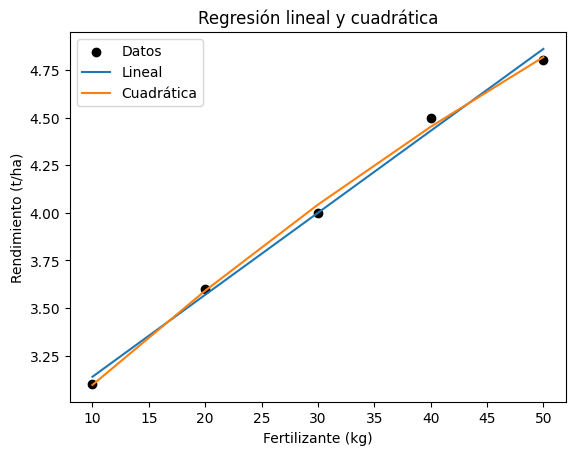

Modelo lineal:  
0.043 x + 2.71
Modelo cuadrático:             2
-0.0002143 x + 0.05586 x + 2.56


In [2]:
import numpy as np 
import matplotlib.pyplot as plt

x = np.array([10, 20, 30, 40, 50])
y = np.array([3.1, 3.6, 4.0, 4.5, 4.8])

coef_lin = np.polyfit(x, y, 1)
coef_quad = np.polyfit(x, y, 2)

p_lin = np.poly1d(coef_lin)
p_quad = np.poly1d(coef_quad)

plt.scatter(x, y, label="Datos", color='black')
plt.plot(x, p_lin(x), label="Lineal")
plt.plot(x, p_quad(x), label="Cuadrática")
plt.legend()
plt.title("Regresión lineal y cuadrática")
plt.xlabel("Fertilizante (kg)")
plt.ylabel("Rendimiento (t/ha)")
plt.savefig(r"C:\Users\marco\Downloads\regresion.png")
plt.show()

print("Modelo lineal:", p_lin)
print("Modelo cuadrático:", p_quad)

## **Punto 4. Derivación numérica (20%)**

| x | f(x) |
|---|------|
| 0 | 1.0 |
| 0.5 | 1.65 |
| 1.0 | 2.72 |
| 1.5 | 4.48 |


In [3]:
x = np.array([0, 0.5, 1.0, 1.5])
f = np.array([1.0, 1.65, 2.72, 4.48])
h = x[1] - x[0]

fwd = (f[2] - f[1]) / h
ctr = (f[3] - f[1]) / (2*h)

print(f"Derivada hacia adelante en x=0.5: {fwd:.3f}")
print(f"Derivada centrada en x=1.0: {ctr:.3f}")

Derivada hacia adelante en x=0.5: 2.140
Derivada centrada en x=1.0: 2.830


## **Punto 5. Ejercicio de aplicación integrada (20%)**

| Día (x) | Temperatura (°C) | Crecimiento (cm/día) |
|----------|------------------|----------------------|
| 1 | 25 | 2.1 |
| 2 | 27 | 2.6 |
| 3 | 30 | 3.0 |
| 4 | 33 | 3.4 |
| 5 | 35 | 3.8 |


In [2]:
import numpy as np 
from scipy.interpolate import interp1d 

x = np.array([25, 27, 30, 33, 35])
y = np.array([2.1, 2.6, 3.0, 3.4, 3.8])

interp_quad = interp1d(x, y, kind='quadratic')
y31 = interp_quad(31)

coef_lin = np.polyfit(x, y, 1)
p_lin = np.poly1d(coef_lin)

dy_dx = (y[3] - y[1]) / (x[3] - x[1])

print(f"Crecimiento interpolado a 31°C: {y31:.2f} cm/día")
print(f"Modelo lineal: {p_lin}")
print(f"Derivada centrada ≈ {dy_dx:.3f} cm/día/°C")

Crecimiento interpolado a 31°C: 3.12 cm/día
Modelo lineal:  
0.1603 x - 1.829
Derivada centrada ≈ 0.133 cm/día/°C


## **Autoevaluación computacional**

In [ ]:
assert abs(y3_lin - 29.0) < 1.0, "Verifique la interpolación lineal."
assert abs(y5_quad - 44.0) < 1.5, "Verifique la interpolación cuadrática."
assert abs(fwd - 2.14) < 0.3, "Verifique la derivada hacia adelante."
assert abs(ctr - 2.83) < 0.3, "Verifique la derivada centrada."
print("Autoevaluación superada: los resultados son coherentes.")

NameError: name 'y3_lin' is not defined

In [4]:
def f(x): 
    return x**3 -2*x**2 + 1

In [6]:
f(3)

10